In [42]:
import math
def AMS(s, b):
    return math.sqrt(2*((s+b)*math.log(1+s/b)-s))

<AxesSubplot:xlabel='$m_{e\\mu}$ [GeV]', ylabel='Events'>

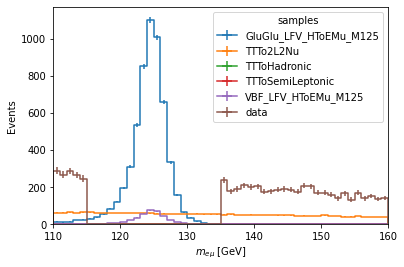

In [43]:
from coffea.util import save, load
from coffea import hist

histo = load("../results/2017/bTagWP/output.coffea")
hist.plot1d(histo[0]['emMass_deepjet_L'])

<AxesSubplot:xlabel='$m_{e\\mu}$ [GeV]', ylabel='Events'>

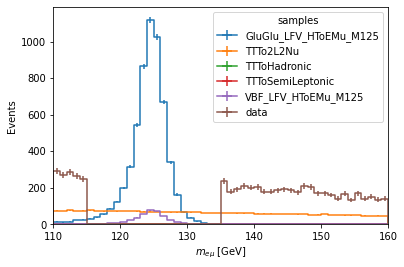

In [44]:
hist.plot1d(histo[0]['emMass_deepjet_M'])

In [45]:
from coffea.util import save, load
from coffea import hist

histo = load("../results/2017/bTagWP/output.coffea")

deepJet_L, deepJet_M = histo[0]['emMass_deepjet_L'].values(), histo[0]['emMass_deepjet_M'].values()
#deepcsv_L, deepcsv_M = histo[0]['emMass_deepcsv_L'].values(), histo[0]['emMass_deepcsv_M'].values()

signals = ['GluGlu_LFV_HToEMu_M125', 'VBF_LFV_HToEMu_M125']
bkgs = ['TTTo2L2Nu', 'TTToSemiLeptonic', 'TTToHadronic']

data_Jet_L, data_Jet_M = deepJet_L[('data',)].sum(), deepJet_M[('data',)].sum()
signal_Jet_L, signal_Jet_M, bkg_Jet_L, bkg_Jet_M = 0, 0, 0, 0

# data_csv_L, data_csv_M = deepcsv_L[('data',)].sum(), deepcsv_M[('data',)].sum()
# signal_csv_L, signal_csv_M, bkg_csv_L, bkg_csv_M = 0, 0, 0, 0

for i in signals:
    signal_Jet_L+= deepJet_L[(i,)].sum()
    signal_Jet_M+= deepJet_M[(i,)].sum()
#     signal_csv_L+= deepcsv_L[(i,)].sum()
#     signal_csv_M+= deepcsv_M[(i,)].sum()

for i in bkgs:
    bkg_Jet_L+= deepJet_L[(i,)].sum()
    bkg_Jet_M+= deepJet_M[(i,)].sum()
#     bkg_csv_L+= deepcsv_L[(i,)].sum()
#     bkg_csv_M+= deepcsv_M[(i,)].sum()

print('kind', 'Jet L', 'Jet M', 'CSV L', 'CSV M' )
print('signal', signal_Jet_L, signal_Jet_M)#, signal_csv_L, signal_csv_M)
print('bkg', bkg_Jet_L, bkg_Jet_M)#, bkg_csv_L, bkg_csv_M)
print('data', data_Jet_L, data_Jet_M)#, data_csv_L, data_csv_M)
print('AMS', AMS(signal_Jet_L, bkg_Jet_L), AMS(signal_Jet_M, bkg_Jet_M))#, AMS(signal_csv_M, bkg_csv_M), AMS(signal_csv_M, bkg_csv_M))

kind Jet L Jet M CSV L CSV M
signal 6107.143924603346 6196.330660362505
bkg 2680.6716210837935 3134.873494920072
data 5773.0 5773.0
AMS 93.02278108772077 89.24030334800756


93.02278108772077